# 지도학습 (분류)

- 분류 모델
    - 의사결정나무
    - 렌덤포레스트
    - XGBoost
    
- 교차검증
    - Kfold
    - StratifiedKfold

- 평가(분류)
    - 정확도
    - 정밀도
    - 재현율
    - F1
    - ROC-AUC

<br>

## 데이터 확인

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 데이터 생성
from sklearn.datasets import load_breast_cancer

def make_dataset():
    iris = load_breast_cancer()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.5, random_state=42
    )
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((284, 30), (285, 30), (284,), (285,))

In [ ]:
# 타겟 확인
y_train.value_counts()

,count
target,
1,170
0,114


<br>

## 의사결정나무

- 지도학습 알고리즘(분류, 회귀)
    - 분류에서 가장 유용하게 사용되고 있는 기법 중 하나
    - 직관적인 알고리즘. 이해 쉬움.
- 트리의 루드(root)에서 시작해서 정보이득이 최대가 되는 특성으로 나눔
- 정보이득(imformation gain)이 최대가 되는 특성을 나누는 기준(불순도를 측정하는 기준)은 '지니'와 '엔트로피'가 사용됨
- 데이터가 한 종류만 있다면 엔트로피/지니 불순도는 0에 가까움. 서로 다른 데이터의 비율이 비슷하면 1에 가까움
- 정보이득이 최대 (1-불순도)
    - 불순도가 낮은 값을 찾아나가는 것
- 과대적합 되기 쉬운 알고리즘 (트리 깊이 제한 필요)


In [ ]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9368421052631579

### 의사결정나무 하이퍼파라미터

- criterion(기본값 gini): 불순도 지표 (또는 엔트로피 불순도 entropy)
- max_depth(기본값 None): 최대 한도 깊이
- max_leaf_modes(기본값 None): 리프 노드의 최대 개수
- min_samples_split(기본값 2): 자식 노드를 갖기 위한 최소한의 데이터 수
- min_samples_leaf(기본값 1): 리프 노드가 되기 위한 최소 샘플 수

<br>

어떤 하이퍼파라미터 값이 좋은가?
- 데이터마다, 모델마다 다를 수 있다
- 그리드서치나 랜덤서치로 하이퍼파라미터 값을 자동을 찾아줄 수 있다.

In [ ]:
# 의사결정나무 하이퍼파라미터: 예시
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9228070175438596

<br>

## 랜덤포레스트

- 지도학습 알고리즘 (분류, 회귀)
- 의사결정나무의 앙상블
- 여러 개의 의사결정트리로 구성
    - 성능이 좋음 (과대적합 가능성 낮음)
- 부트스트랩 샘플링 (데이터셋 중복 허용)
- 최종 다수결 투표(voting)
- 앙상블
    - 배깅: 같은 알고리즘으로 여러 모델을 만들어 분류함 (RandomForest)
    - 부스팅: 학습과 예측을 하면서 가중치 반영 (XGBoost)

In [30]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.968421052631579

### 랜덤포레스트 하이퍼파라미터

- n_estimators(기본값 100): 트리의 수
- criterion(기본값 gini): 불순도 지표
- max_depth(기본값 None): 최대 한도 깊이
- min_samples_split(기본값 2): 자식 노드를 갖기 위한 최소한의 데이터 수
- min_samples_leaf(기본값 1): 리프 노드가 되기 위한 최소 샘플 수


In [31]:
# 랜덤포레스트 하이퍼파라미터: 예시
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=300,
    random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

# 파라미터 변경에 따른 모델 결과 (현재 기준 변경사항만)
# 0.968421052631579
# 0.9508771929824561 - max_depth=3, default

0.9754385964912281

<br>

## XGBoost

- eXtreme Gradient Boosting
- 부스팅(앙상블) 기반 알고리즘
    - 트리 앙상블 중 성능이 좋은 알고리즘
- 약한 학습기가 계속해서 업데이트를 하며 좋은 모델을 만들어 감
- 캐글(글로벌 AI 경진대회)에서 뛰어난 성능을 보이면서 인기가 높아짐

In [32]:
# xgboost
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9649122807017544

### XGBoost 하이퍼파라미터

- booster(기본값 gbtree): 부스팅 알고리즘 (또는 dart, gblinear)
- objective(기본값 binary:logistic): 이진분류 (다중분류: multi:softmax)
- max_depth(기본값 6): 최대 한도 깊이
- learning_rate(기본값 0.1): 학습률
- n_estimators(기본값 100): 트리의 수
- subsample(기본값 1): 훈련 샘플 개수의 비율
- colsample_bytree(기본값 1): 특성 개수의 비율
- n_jobs(기본값 1): 사용 코어 수 (-1: 모든 코어를 다 사용)

<br>

주의) leanrinng_rate 값을 낮췄다면, n_estimators 값은 높여야 한다.

`learning_rate ↓ → n_estimators ↑`

> earning_rate는 각 트리의 기여도를 조절하는 보폭 역할을 한다.  
작게 설정하면 모델이 신중하게 조금씩 가중치를 조정하며 학습한다.  
(e.g., 학습률 0.1 → 트리 하나가 예측에 10%)
>
>트리 하나하나의 영향력이 줄어드니, 전체 모델이 충분히 복잡해지려면 더 많은 트리가 필요하다.
- 낮은 learning_rate에 트리 개수가 적으면 학습 부족
- 높은 learning_rate에 트리 개수를 너무 많이 주면 과적합

> learning_rate를 낮추면 각 트리의 영향력이 줄어들기 때문에 모델이 충분히 학습되기 위해 n_estimators를 더 높게 설정해야 한다.










In [49]:
# xgboost 하이퍼파라미터: 예시
from xgboost import XGBClassifier
model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    max_depth=5,
    learning_rate=0.07,
    n_estimators=200,
    subsample=1,
    colsample_bytree=1,
    n_jobs=-1,
    random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

# 0.9649122807017544
# 0.968421052631579  - max_depth=3, default
# 0.9719298245614035 - learning_rate=0.07, n_estimators=200
#                    - learning_rate=0.05, n_estimators=500

0.9719298245614035

In [57]:
# 조기종료
model = XGBClassifier(
    # eval_metric='logloss',
    early_stopping_rounds=10,  # 10번을 돌렸는데 더이상 성능 향상이 없으면 멈춤
    learning_rate=0.07,
    n_estimators=200,
    random_state=0)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set,)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

[0]	validation_0-logloss:0.60063
[1]	validation_0-logloss:0.55678
[2]	validation_0-logloss:0.51808
[3]	validation_0-logloss:0.48287
[4]	validation_0-logloss:0.45155
[5]	validation_0-logloss:0.42367
[6]	validation_0-logloss:0.39916
[7]	validation_0-logloss:0.37746
[8]	validation_0-logloss:0.35662
[9]	validation_0-logloss:0.33789
[10]	validation_0-logloss:0.32214
[11]	validation_0-logloss:0.30636
[12]	validation_0-logloss:0.29151
[13]	validation_0-logloss:0.27738
[14]	validation_0-logloss:0.26472
[15]	validation_0-logloss:0.25357
[16]	validation_0-logloss:0.24229
[17]	validation_0-logloss:0.23243
[18]	validation_0-logloss:0.22264
[19]	validation_0-logloss:0.21384
[20]	validation_0-logloss:0.20597
[21]	validation_0-logloss:0.19796
[22]	validation_0-logloss:0.19182
[23]	validation_0-logloss:0.18542
[24]	validation_0-logloss:0.17872
[25]	validation_0-logloss:0.17264
[26]	validation_0-logloss:0.16707
[27]	validation_0-logloss:0.16202
[28]	validation_0-logloss:0.15743
[29]	validation_0-loglos

0.968421052631579

<br>

## 교차검증

일반적으로 모델을 학습시킬 때 데이터를 train set과 test set으로 나누어 train set을 가지고 학습을 수행한다. 교차검증이란 여기서 train set을 다시 train set과 validation set으로 나누어 학습 중 검증과 수정을 수행하는 것을 의미한다.

In [59]:
# 데이터셋 로드
def make_dataset2():
    iris = load_breast_cancer()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['target'] = iris.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

### Kfold

- 일반적으로 사용되는 교차 검증 기법

In [60]:
# KFold
from sklearn.model_selection import KFold
model = DecisionTreeClassifier(random_state=0)

kfold = KFold(n_splits=5)
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(accuracy_score(y_test, pred))

0.8771929824561403
0.9122807017543859
0.9473684210526315
0.9385964912280702
0.8407079646017699


<br>

### StratifiedKfold

- 불균형한 타겟 비율을 가진 데이터(불균형 데이터)가 한쪽으로 치우치는 것을 방지

In [61]:
# Stratified Kfold
from sklearn.model_selection import StratifiedKFold
model = DecisionTreeClassifier(random_state=0)

kfold = StratifiedKFold(n_splits=5)
# 타켓 데이터(y)가 split이 되는 것이 아니라, 타켓 확인을 위해 추가
for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(accuracy_score(y_test, pred))

0.9035087719298246
0.9210526315789473
0.9122807017543859
0.9473684210526315
0.9026548672566371


<br>

### 사이킷런 교차검증

- 사이킷런 내부 API를 통해 fit(학습) - predict(예측) - evaluation(평가)


In [69]:
# 교차검증
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=3)
scores

array([0.88947368, 0.94210526, 0.86243386])

In [70]:
# 평균 점수
scores.mean()

np.float64(0.8980042699340944)

In [67]:
# 교차검증 Stratified Kfold
kfold = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kfold)
scores

array([0.90350877, 0.92105263, 0.9122807 , 0.94736842, 0.90265487])

In [68]:
# 평균점수
scores.mean()

np.float64(0.9173730787144851)

<br>

# 평가(분류)

- 정확도 accuracy: 실제 값과 예측값이 일치하는 비율
- 정밀도 precision: 양성이라고 예측한 값 중 - 실제 양성인 값의 비율 (암이라고 예측 한 값 중 실제 암)
- 재현율 recall: 실제 양성 값 중 양성으로 예측한 값의 비율 (암을 암이라고 판단)
- F1: 정밀도와 재현율의 조화평균 (정밀도와 재현율은 trade-off 관계)
- ROC-AUC
    - ROC: 참 양성 비율(True Positive Rate)에 대한 거짓 양성 비율(False Positive Rate) 곡선
    - AUC: ROC곡선 아래 면적 (완벽하게 분류되면 AUC가 1임)

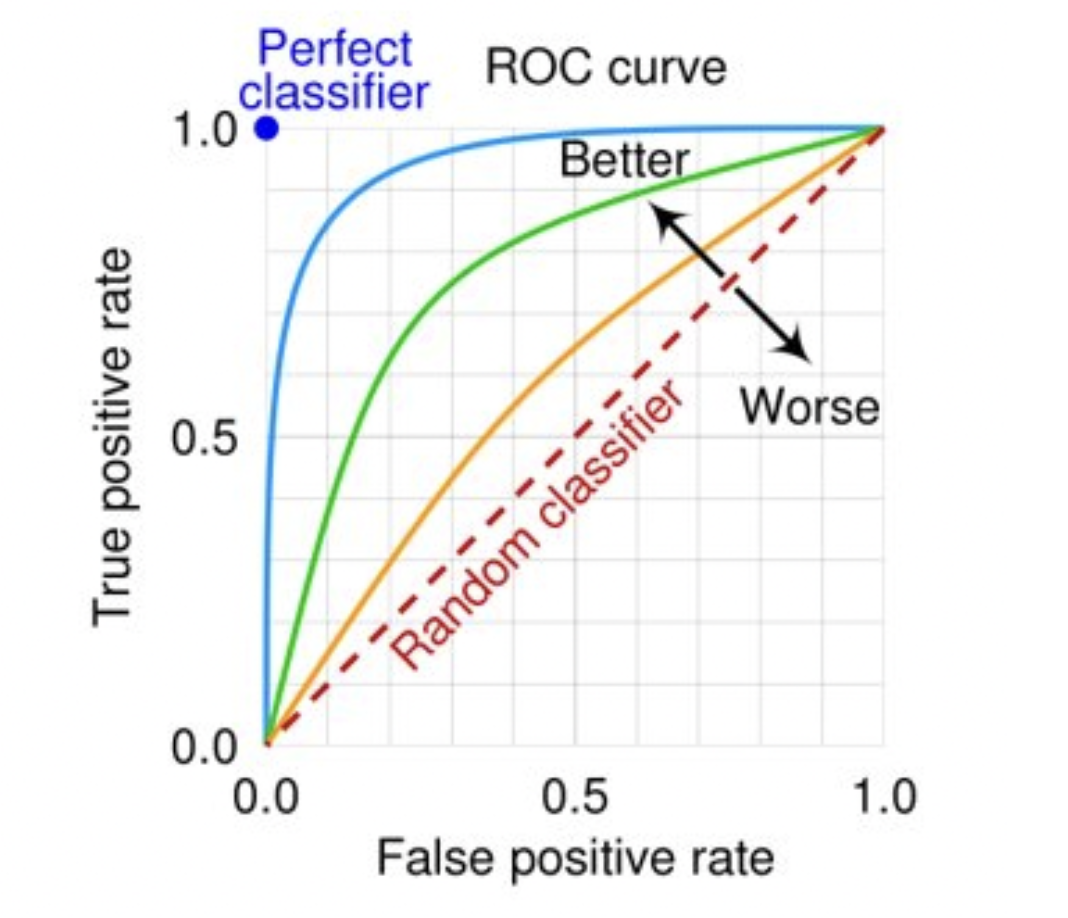

In [71]:
# 정확도
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9026548672566371

In [75]:
# 정밀도
from sklearn.metrics import precision_score
precision_score(y_test, pred)

0.9545454545454546

In [76]:
# 재현율
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.8873239436619719

In [77]:
# f1
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.9197080291970803

In [86]:
# roc_auc
from sklearn.metrics import roc_auc_score
model = XGBClassifier(random_state=0)
model.fit(X_train, y_train)
pred = model.predict_proba(X_test)  # predict_proba: 클래스별 '확률' 결과 값(0, 1)

roc_auc_score(y_test, pred[:,1])  # 1일 확률 기준으로 AUC 계산 (,: 다차원 배열에서 행과 열을 구분하여 인덱싱)

np.float64(0.9983232729711603)